<a href="https://colab.research.google.com/github/erinijapranckeviciene/MLdata/blob/main/umap_ir_hierarchinis_klasterizavimas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Pavyzdyje parodyta veiksmų seka, kurią reikia atlikti su išanalizuoto tinklo duomenimis. Čia duomenys ne tinklo. Jums reikia pakeisti duomenis ir panaudoti PANAŠIĄ TYRIMO LOGIKĄ. ***

### Pavyzdyje yra panaudoti duomenys apie savižudybių statistiką pagal Tarptautinės Sveikatos Organizacijos duomenis. 

In [1]:
import pandas as pd
# ikeliu duomenis is Github, taip patogiau
url="https://raw.githubusercontent.com/GabrieleKasputyte/Duomenu-gavyba/main/CSV/mortd.csv"
mortd = pd.read_csv(url,encoding="latin")

In [2]:
mortd

,Country,Year,PmortBoth,PmortMale,PmortFemale,RSuicBoth,RSuicMale,RSuicFemale,CY,"Population ages 0-14, female (% of female population)","Population ages 0-14, male (% of male population)","Population ages 10-14, female (% of female population)","Population ages 10-14, male (% of male population)","Population ages 15-19, female (% of female population)","Population ages 15-19, male (% of male population)","Population ages 20-24, female (% of female population)","Population ages 20-24, male (% of male population)","Population ages 25-29, female (% of female population)","Population ages 25-29, male (% of male population)","Population ages 30-34, female (% of female population)","Population ages 30-34, male (% of male population)","Population ages 35-39, female (% of female population)","Population ages 35-39, male (% of male population)","Population ages 40-44, female (% of female population)","Population ages 40-44, male (% of male population)","Population ages 45-49, female (% of female population)","Population ages 45-49, male (% of male population)","Population ages 50-54, female (% of female population)","Population ages 50-54, male (% of male population)","Population ages 55-59, female (% of female population)","Population ages 55-59, male (% of male population)","Population ages 60-64, female (% of female population)","Population ages 60-64, male (% of male population)","Population ages 65-69, female (% of female population)","Population ages 65-69, male (% of male population)","Population ages 70-74, female (% of female population)","Population ages 70-74, male (% of male population)","Population ages 75-79, female (% of female population)","Population ages 75-79, male (% of male population)","Population ages 80 and above, female (% of female population)","Population ages 80 and above, male (% of male population)","Population, female","Population, male"
0,Afghanistan,2019,35.3,34.4,36.2,4.1,4.6,3.6,Afghanistan 2019,42.59679246,42.35420188,13.51315874,13.38952152,11.87149113,11.88710933,9.961009138,9.988106849,7.741214767,7.94343925,6.14755378,6.430479033,5.155172069,5.29074984,4.097513887,4.272471397,3.262040954,3.326697808,2.620193463,2.612504517,2.064522367,2.02930128,1.6002621,1.501782385,1.20763093,1.063440365,0.891814674,0.689697301,0.460695018,0.377240296,0.322093255,0.232778472,18512029,19529725
1,Afghanistan,2018,35.4,34.7,36.0,4.1,4.6,3.5,Afghanistan 2018,43.22341557,42.96393194,13.57990725,13.4743477,11.88151655,11.87172207,9.813102903,9.859701253,7.582571906,7.837661079,6.105887428,6.367722526,5.081775258,5.235556218,4.029398062,4.195035857,3.222141152,3.27310843,2.587544283,2.582500862,2.041979483,1.999985021,1.578980644,1.480932086,1.218991509,1.050733505,0.862531355,0.677864707,0.449181611,0.370218618,0.320982291,0.233325824,18079105,19093281
2,Afghanistan,2017,35.5,35.0,35.9,4.1,4.6,3.4,Afghanistan 2017,43.82367254,43.54888233,13.6297315,13.54231198,11.89814673,11.85496879,9.633427011,9.718139919,7.437189011,7.743829946,6.086427857,6.313574668,4.998468045,5.180118899,3.968176151,4.116269662,3.189747115,3.229221984,2.557349681,2.557668795,2.023596975,1.97209037,1.561499844,1.464755628,1.238593513,1.040714969,0.824387674,0.666545679,0.444555882,0.363425126,0.314761978,0.229793236,17644266,18652134
3,Afghanistan,2016,35.6,35.1,36.0,4.0,4.4,3.6,Afghanistan 2016,44.42952369,44.12317396,13.68265497,13.60327056,11.89263175,11.82541216,9.436873642,9.575249214,7.309121394,7.656152523,6.066154556,6.262706195,4.914487841,5.121429083,3.912710338,4.041739938,3.160786958,3.192578169,2.530135728,2.53542724,2.007550113,1.947215686,1.552235824,1.452450031,1.255237109,1.032226656,0.786884929,0.65588079,0.441863513,0.356282077,0.303802609,0.222076282,17196083,18187045
4,Afghanistan,2015,35.6,35.4,35.7,4.0,4.3,3.6,Afghanistan 2015,45.06469222,44.69956349,13.74243406,13.65860187,11.84026579,11.77183907,9.238713618,9.440355813,7.201288518,7.571510976,6.027594066,6.210430231,4.836473155,5.057246438,3.862325113,3.975717518,3.132

## Grafikas parodo kintamojo RSuicBoth kitimą pagal metus. Jūsų duomenims tai yra nereikalinga nebent matote naudą savo duomenims tuo pačiu metodu atvaiduodami kokią kitą duomenų charakteristiką.

> Indented block



In [ ]:
import seaborn as sns

mortd['Year']=mortd['Year'].astype(float)
mortd['RSuicBoth']=mortd['RSuicBoth'].astype(float)

sns.relplot(x="Year", y="RSuicBoth", col="Country", col_wrap=10,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=mortd);
#len(np.unique(mortd['Country']))

## Performuojam duomenis taip kad eilutės būtų šalys, stulpeliai metai, o matricos elementai būtų savižudybių skaičius.  Tokiai duomenų matricai atliekam umap matumo sumažinimą. Čia mes turime tris variantus - savižudybių skaičius moterų tarpe, vyrų tarpe ir abiejų lyčių kartu.  

## ***Jūsų atveju duomenys bus - eilutės - tinklo mazgai, stulpeliai tinklo parametrai , o matricos elementai tinklo parametrų reikšmės kiekvienam tinklo mazgui.*** 



In [4]:
# Both Genders
mortd_cyb=mortd[['Country','Year','RSuicBoth']].copy() # country year RSuicBoth
mortd_cyb_reshaped=mortd_cyb.pivot(index='Country',columns='Year',values='RSuicBoth')
mortd_cyb_reshaped=mortd_cyb_reshaped.astype(float)

# Males
mortd_cym=mortd[['Country','Year','RSuicMale']].copy() # country year RSuicMale
mortd_cym_reshaped=mortd_cym.pivot(index='Country',columns='Year',values='RSuicMale')
mortd_cym_reshaped=mortd_cym_reshaped.astype(float)

# Females
mortd_cyf=mortd[['Country','Year','RSuicFemale']].copy() # country year RSuicFemale
mortd_cyf_reshaped=mortd_cyf.pivot(index='Country',columns='Year',values='RSuicFemale')
mortd_cyf_reshaped=mortd_cyf_reshaped.astype(float)

In [5]:
mortd_cyb_reshaped

Year,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Country,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.9,5.0,5.0,5.0,5.0,5.0,4.9,4.8,4.6,4.4,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1
Albania,4.9,4.5,4.6,4.8,4.8,7.5,7.8,8.1,8.2,8.1,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3
Algeria,4.5,4.5,4.4,4.1,4.0,3.9,3.7,3.5,3.4,3.2,3.0,3.0,2.9,2.9,2.8,2.7,2.6,2.5,2.5,2.5
Angola,8.7,8.6,8.6,8.8,8.6,8.1,8.6,7.4,7.5,6.7,7.0,6.6,6.9,6.9,6.4,6.5,6.2,6.0,6.0,6.1
Antigua and Barbuda,1.9,1.9,1.3,1.3,1.7,1.3,0.5,0.4,0.3,0.0,0.2,0.2,0.0,0.0,0.4,0.4,0.5,0.0,0.4,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Uruguay,16.0,14.5,19.8,15.6,15.3,14.8,15.5,17.4,15.1,15.0,16.0,16.8,17.8,15.8,17.4,18.6,21.1,20.8,21.2,21.2
Uzbekistan,10.1,10.0,9.7,9.0,8.6,9.1,8.8,8.6,8.5,8.0,8.1,8.5,8.9,8.9,9.0,9.2,9.1,8.8,8.6,8.0
Vanuatu,19.1,18.9,19.1,19.0,18.6,18.2,19.2,19.1,18.9,19.8,19.5,19.0,19.1,18.9,18.2,18.2,18.0,18.1,18.1,18.0


In [ ]:
#mortd_cyf_reshaped.loc['Afghanistan',:] # how to take one row

## Panaudojam umap kad pamatyti strukturą duomenyse. Umap metodas paremtas taškų kaimynyste. Artimi duomenų taškai apjungiami į grafą ir tankiai sujungti grafai grupuojami į klasterius. Pagal nutylėjimą (by default) atstumas tarp duomenų taškų vertinamas pagal Euklidinio atstumo metriką. Tinklo atveju ir šiuo duomenų atveju Euklidinis atstumas tinkamas vertinti taškų erdvėje gretimumą.  

# Umap biblioteka standartiškai nėra sudiegta colab virtualioje mašinoje. Ją reikia sudiegti, tačiau kito prisijungimo metu vėl reikės sudiegti, nes pakeitimai colab aplinkoje neišlieka. 

In [ ]:
!pip install umap-learn

# Sukuriam umap objektus.

In [7]:
import umap
import matplotlib.pyplot as plt

reducerb=umap.UMAP(random_state=0)
reducerm=umap.UMAP(random_state=0)
reducerf=umap.UMAP(random_state=0)



## Atvaizduojam daugiamačius taškus ( matumas - vektoriaus ilgis 20 ) į dvimatę erdvę. Šių duomenų atveju sukuriam tris atvaizdavimus - abiejų lyčių, moterų ir vyrų, šiuos tris atvaizdavimus apjungiam į 6-matę matricą ir dar kartą atvaizduojam dvimatėje erdvėje. 

## Tinklo duomenų atveju tai atliksime tik vieną kartą. 

### mortd - abi lytys

/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


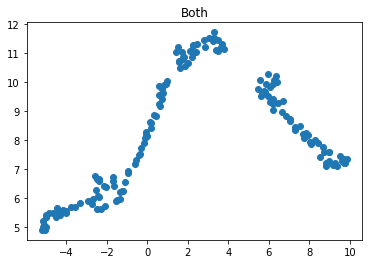

In [8]:
#plt.figure(figsize=(40,40))
embeddingb = reducerb.fit_transform(mortd_cyb_reshaped)
plt.scatter( embeddingb[:, 0], embeddingb[:, 1])
plt.title("Both")
umap_RSuicBoth=pd.DataFrame(data=embeddingb, index=mortd_cyb_reshaped.index, columns=['x','y'])

### mortd - vyrai

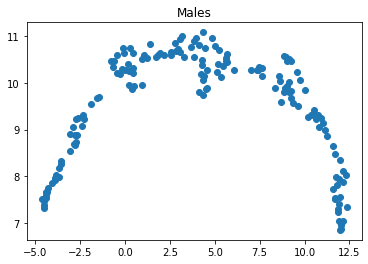

In [9]:
embeddingm = reducerm.fit_transform(mortd_cym_reshaped)
#plt.figure(figsize=(40,40))
plt.scatter( embeddingm[:, 0], embeddingm[:, 1])
plt.title("Males")
umap_RSuicMales=pd.DataFrame(data=embeddingm, index=mortd_cym_reshaped.index, columns=['males_x','males_y'])

### mortd - moterys

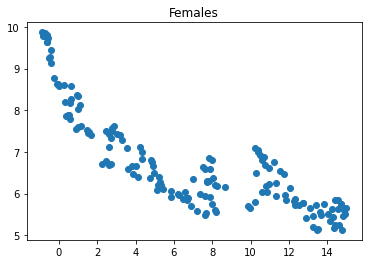

In [10]:
embeddingf = reducerf.fit_transform(mortd_cyf_reshaped)
plt.scatter( embeddingf[:, 0], embeddingf[:, 1])
plt.title("Females")
umap_RSuicFemales=pd.DataFrame(data=embeddingf, index=mortd_cyf_reshaped.index, columns=['females_x','females_y'])

## Visų atvaizdavimų apjungimas

In [11]:
umap1=pd.DataFrame.merge(umap_RSuicBoth,umap_RSuicMales,left_index=True, right_index=True)
umap_isuic=pd.DataFrame.merge(umap1, umap_RSuicFemales,left_index=True, right_index=True)

In [12]:
umap_isuic

,x,y,males_x,males_y,females_x,females_y
Country,,,,,,
Afghanistan,-2.382033,6.641619,11.570339,8.652362,6.908455,5.705636
Albania,-0.290867,7.710455,8.691574,9.595605,6.990319,6.356956
Algeria,-3.765101,5.693362,12.322648,8.018686,2.747051,7.579628
Angola,0.597448,9.556451,4.335208,10.066586,4.347033,7.005946
Antigua and Barbuda,-5.194851,4.905444,12.016613,6.873884,-0.734135,9.851405
...,...,...,...,...,...,...
Uruguay,7.537380,8.477610,-2.607242,9.246941,11.514397,6.534753
Uzbekistan,2.272040,11.286984,3.826005,10.551414,7.997259,6.793099
Vanuatu,7.850484,8.243344,-2.867976,9.065930,12.042015,6.134382


## Su umap transformavus apjungtus duomenis aiškiai matosi du klasteriai ir juose dar kelios smulkios strukturos.  Mes labai suspaudėm informaciją apie savižudybių tendencijas šalyse pastiprindami bendras tendencijas skirtumais tarp vyrų ir moterų. 

## Sudarydami data frame iš umap rezultato sukurkime dar vieną stulpelį kuris identifikuoja klasterį. 

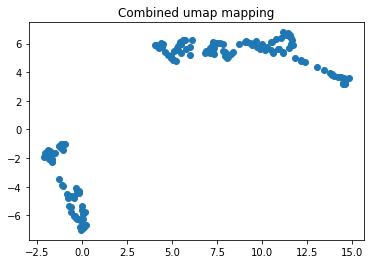

In [20]:
reducerc=umap.UMAP(random_state=0)
embeddingc = reducerc.fit_transform(umap_isuic)
plt.scatter( embeddingc[:, 0], embeddingc[:, 1])
plt.title("Combined umap mapping")
umap_isuic_combined=pd.DataFrame(data=embeddingc, index=umap_isuic.index, columns=['main_clust_X','main_clust_Y'])




## Prijunkime klasterio žymę ir apjunkime su umap rezultatais abiem lytim, vyrams ir moterims kurie yra umap_isuic matricoje. Gauname combined_all, kurį bandysime toliau skirstyti. 

In [ ]:
# Pagal slenkscius
umap_isuic_combined_1=umap_isuic_combined[umap_isuic_combined['main_clust_Y']<0].sort_values(by='main_clust_X')
umap_isuic_combined_2=umap_isuic_combined[umap_isuic_combined['main_clust_Y']>0].sort_values(by='main_clust_X')

pd.set_option('display.max_rows', 160)
umap_isuic_combined_1


In [ ]:
umap_isuic_combined.loc[:,"cluster"]=0
umap_isuic_combined.loc[umap_isuic_combined['main_clust_Y']<0,'cluster']=1
umap_isuic_combined.loc[umap_isuic_combined['main_clust_Y']>0,'cluster']=2
umap_isuic_combined_all=pd.DataFrame.merge(umap_isuic_combined,umap_isuic,left_index=True, right_index=True)
umap_isuic_combined_all


# Analizė su HDBSCAN - labai tinkama kada klasteriai yra labai netiesinės formos. Praleidžiam šitą etapą.

# Analizė su hierarchiniu klasterizavimu, labai gerai tnka kada norime pamatyti kurie objektai yra panašiausi ir nepanašiausi tarpusavyje

In [ ]:
umap_isuic_combined_with_genders_per_year=pd.DataFrame.merge(umap_isuic_combined_all,mortd_cyb_reshaped,left_index=True, right_index=True)
umap_isuic_combined_with_males_per_year=pd.DataFrame.merge(umap_isuic_combined_all,mortd_cym_reshaped,left_index=True, right_index=True)
umap_isuic_combined_with_females_per_year=pd.DataFrame.merge(umap_isuic_combined_all,mortd_cyf_reshaped,left_index=True, right_index=True)

umap_isuic_combined_with_males_per_year



## Pasidarom tik laiko eilutes iš kiekvieno klasterio

In [98]:
isuic_per_year_both_genders_cluster_1=umap_isuic_combined_with_genders_per_year[umap_isuic_combined_with_genders_per_year['cluster']==1].copy()
isuic_per_year_both_genders_cluster_2=umap_isuic_combined_with_genders_per_year[umap_isuic_combined_with_genders_per_year['cluster']==2].copy()

# pasiimam tik laiko eilutes ir transponuojam kada skaiciuojam koreliacija
isuic_per_year_only_both_genders_cluster_1=isuic_per_year_both_genders_cluster_1.iloc[:,9:29]
isuic_per_year_only_both_genders_cluster_2=isuic_per_year_both_genders_cluster_2.iloc[:,9:29]


## Pasižiūrim kokia yra koreliacinė matrica. Matysime iš karto kurios šalys yra panašios  pagal savižudybių dinamiką pagal metus.

In [99]:
pd.set_option('display.max_rows', 5)
isuic_per_year_only_both_genders_cluster_1

,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0
Country,,,,,,,,,,,,,,,,,,,,
Australia,12.7,12.2,11.3,10.5,10.3,11.2,10.6,10.9,11.6,11.2,11.7,11.2,11.7,11.5,12.7,13.2,12.2,13.1,12.4,12.5
Austria,19.9,18.6,19.3,18.2,17.5,17.2,16.4,16.0,15.8,16.0,16.1,16.5,16.3,16.2,16.5,16.0,15.5,15.4,15.7,14.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Vanuatu,19.1,18.9,19.1,19.0,18.6,18.2,19.2,19.1,18.9,19.8,19.5,19.0,19.1,18.9,18.2,18.2,18.0,18.1,18.1,18.0
Zimbabwe,13.3,12.8,13.4,13.2,14.2,14.0,14.4,17.2,20.1,22.2,21.5,20.7,19.7,18.6,18.2,18.0,16.8,15.0,14.0,14.1


## Skaičiuojam koreliacinę matricą. T operacija reiškia kad transponuojame matricą. 

In [100]:
cm_1=isuic_per_year_only_both_genders_cluster_1.T.corr()
cm_2=isuic_per_year_only_both_genders_cluster_2.T.corr()

## Vizualizuokim koreliacinę matricą paprastai. Nelabai informatyvus grafikas. 

In [ ]:
import seaborn as sns
sns.set(font_scale=1)
sns.heatmap(cm_1)

## Vizualizuokim koreliacinę matricą hierarchiškai grupuojant šalis į klasterius pagal jų koreliacijos stiprumą ir kryptį, kad matytume kokios yra grupės. Čia šalys iš pirmo klasterio. Matosi kad pagal panašumą šalys grupuojasi vėl į du klasterius. 

In [131]:
sns.set(font_scale=5)
sns.clustermap(cm_1, figsize=(100,100), cmap="vlag", tree_kws=dict(linewidths=2.5, colors=(0.2, 0.2, 0.4)))

## Sugrupuokim šalis nenaudodami koreliacijos. Grupuojame eilutes  panaudodami clustermap. Dabar grupuojame pagal savižudybių dinamiką metų eigoje. Matosi kad pagal tendencijas Lesotho nepanaši nei į vieną kitą šalį. Matosi ad Loetuva, Rusija, Kazachstanas ir Baltarusija turi labai panašias tendencijas. 

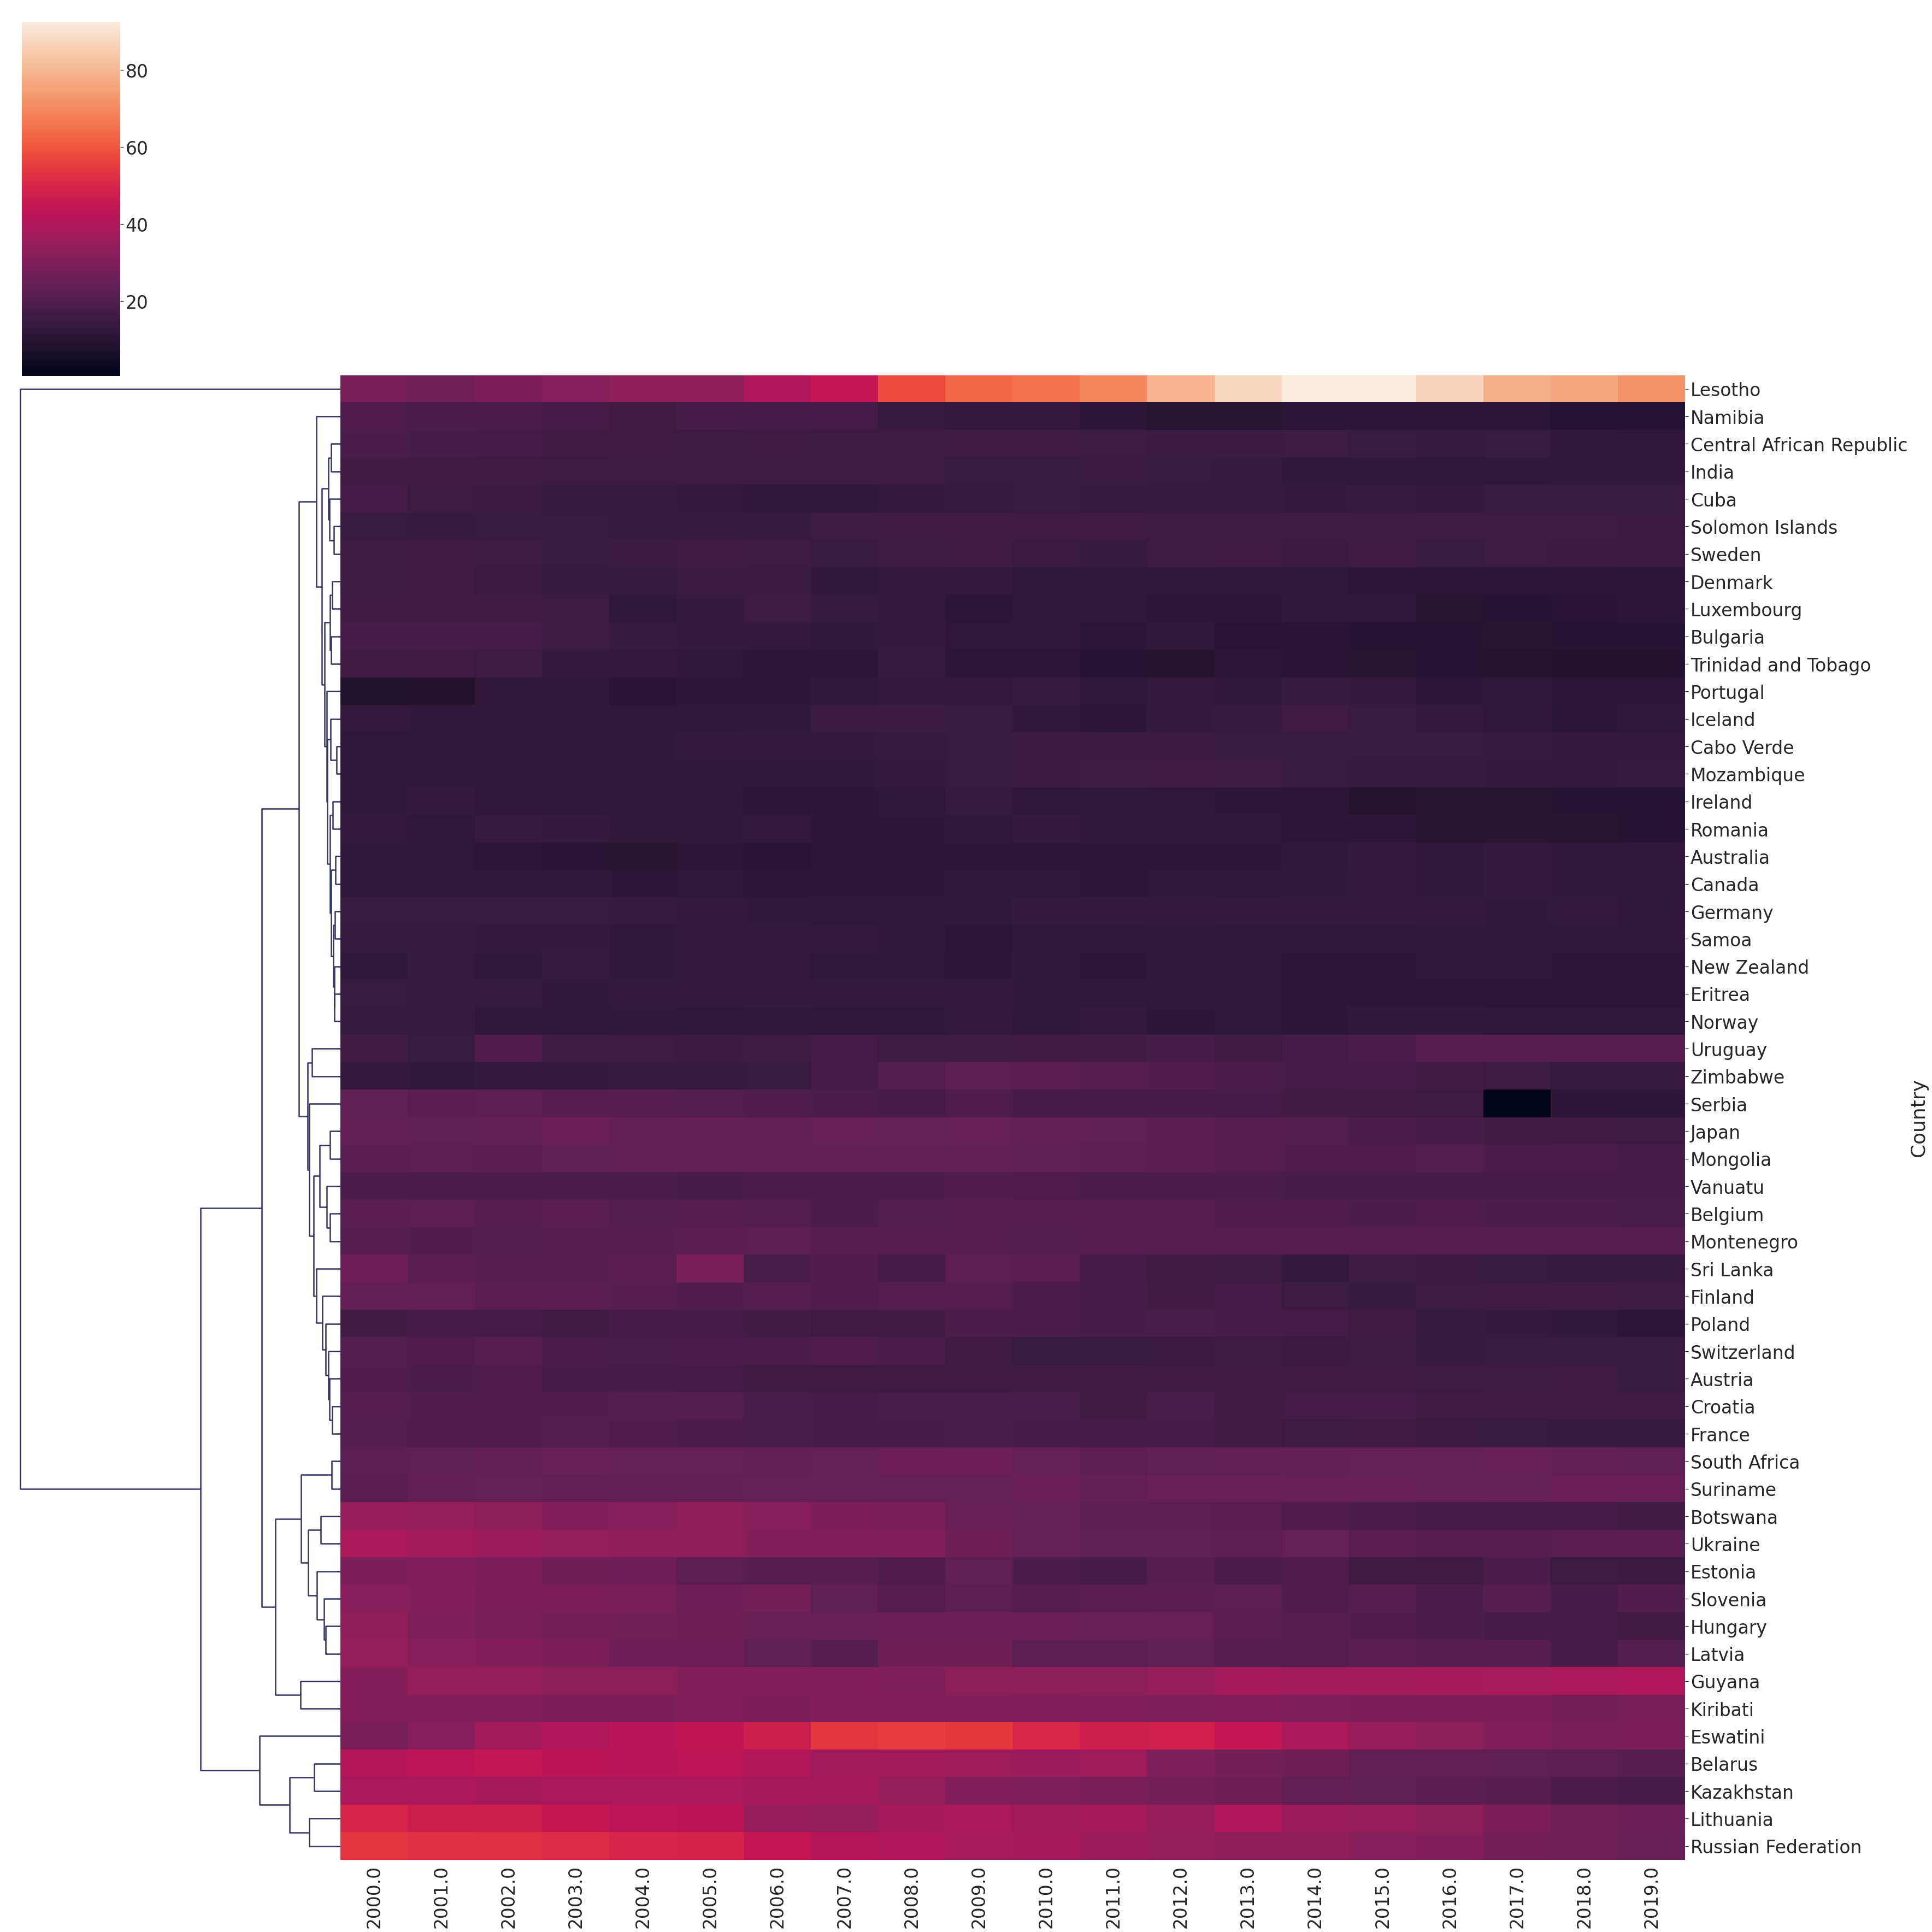

In [130]:
sns.set(font_scale=3)
sns.clustermap(isuic_per_year_only_both_genders_cluster_1, figsize=(50,50), col_cluster=None, tree_kws=dict(linewidths=2.5, colors=(0.2, 0.2, 0.4)))

## Užrašome matricas į failus, kuriuos galime parsisiųsti. CSV failiukai atsiranda aplanke (šoninis mygtukas).  

In [34]:
umap_isuic_combined_1.to_csv("Salys1.csv",index=True)
umap_isuic_combined_2.to_csv("Salys2.csv",index=True)
umap_isuic_combined_with_males_per_year.to_csv('isuic_males.csv',index=True)
umap_isuic_combined_with_females_per_year.to_csv('isuic_females.csv',index=True)
umap_isuic_combined_with_genders_per_year.to_csv('isuic_both_genders.csv',index=True)

# Boxplot - palyginti savižudybių skaičius pagal šalis pirmam ir antram klasteryje. Boxplot labai gerai parodo duomenų išsibarstymą ir labai tinka palyginti vertes skirtingose grupėse. 

## Vėl reikia pasigaminti teisingą formatą iš duomenų.  Šalys ir metai ir klasteris turi būti kaip faktoriai, o savižudybių skaičius kaip vertės. Pirmiausiai pasiliekam tik tuos duomenis kurių reikia.

In [116]:
pd.set_option('display.max_rows', 5)
selection=umap_isuic_combined_with_genders_per_year.iloc[:, 9:29 ]
selection['cluster']=umap_isuic_combined_with_genders_per_year['cluster']
selection['Country']=umap_isuic_combined_with_genders_per_year.index
selection

,2000.0,2001.0,2002.0,2003.0,2004.0,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0,2015.0,2016.0,2017.0,2018.0,2019.0,cluster,Country
Country,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,4.9,5.0,5.0,5.0,5.0,5.0,4.9,4.8,4.6,4.4,4.3,4.1,4.0,4.0,3.9,4.0,4.0,4.1,4.1,4.1,2,Afghanistan
Albania,4.9,4.5,4.6,4.8,4.8,7.5,7.8,8.1,8.2,8.1,7.8,7.9,5.2,5.3,5.0,4.8,4.7,4.7,4.5,4.3,2,Albania
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zambia,13.3,12.4,12.1,11.6,12.2,11.9,11.7,10.3,9.7,9.8,10.1,10.3,9.4,9.1,9.0,8.7,8.5,8.5,8.1,7.3,2,Zambia
Zimbabwe,13.3,12.8,13.4,13.2,14.2,14.0,14.4,17.2,20.1,22.2,21.5,20.7,19.7,18.6,18.2,18.0,16.8,15.0,14.0,14.1,1,Zimbabwe


## Toliau reikia transformuoti matricą į pageidaujamą formatą

In [119]:
reshaped_selection=selection.melt(id_vars=['Country','cluster'], var_name='Year', value_name='SuicideRate')
reshaped_selection

,Country,cluster,Year,SuicideRate
0,Afghanistan,2,2000,4.9
1,Albania,2,2000,4.9
...,...,...,...,...
3178,Zambia,2,2019,7.3
3179,Zimbabwe,1,2019,14.1


## Dabar galime nusibraižyti box-plot

### Braižom tik pagal priklausonybę klasteriui


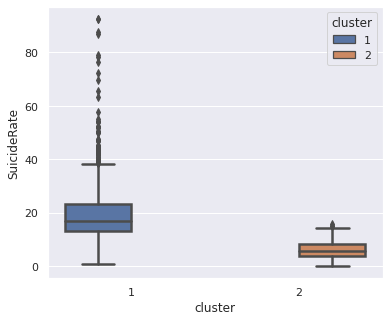

In [127]:
sns.set(rc={"figure.figsize":(6, 5)}) #width=6, height=5
sns.boxplot(x="cluster", y="SuicideRate", hue="cluster", orient="v", data=reshaped_selection, linewidth=2.5)

### Aiškiai matosi kad antram klasteryje yra žymiai mažesnis rate

## Braižom boxplot pagal šalis ir klasterį kad pamatyti savižudybių skaičiaus išsibarstymą bendrai ir kad galėtume palyginti šalis tarpusavyje. 

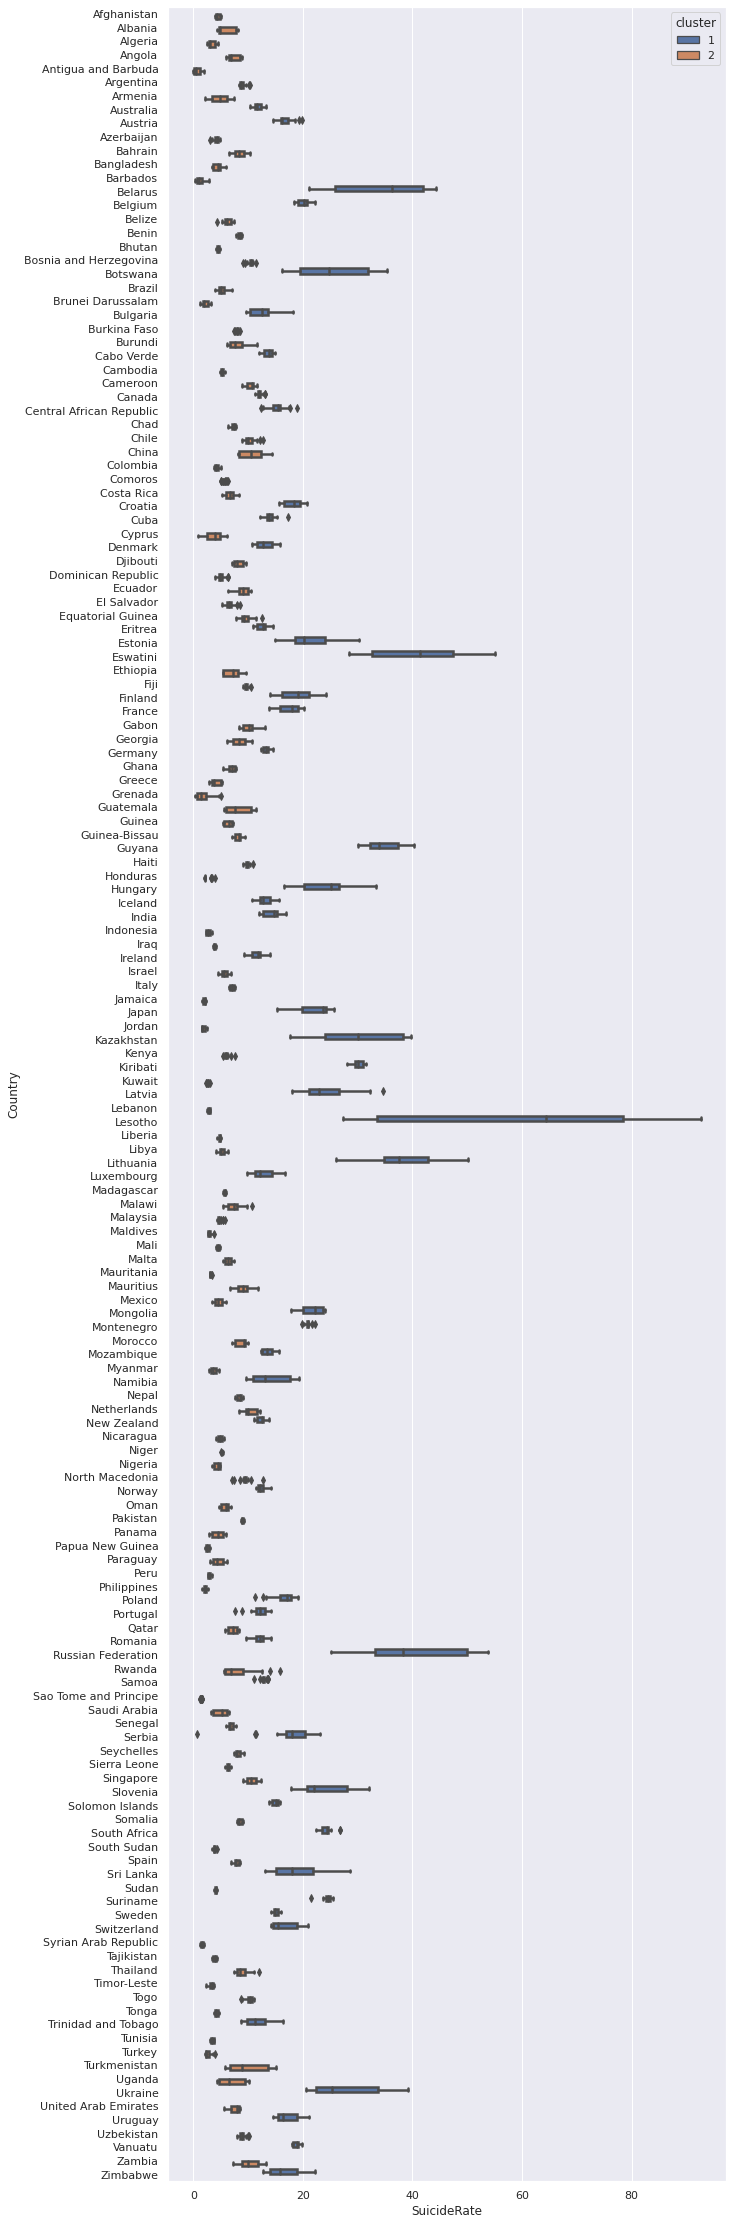

In [128]:
sns.set(rc={"figure.figsize":(10, 40)}) #width=6, height=5
sns.boxplot(y="Country", x="SuicideRate", hue="cluster", orient="h", data=reshaped_selection, linewidth=2.5)

# TINKLO DUOMENIMS REIKIA PRITAIKYTI UMAP, IŠTIRTI KOKIE KLASTERIAI SUSIDARĖ, AR GALIMA KLASTERIUS AIŠKIAI ATSKIRTI. 



#SUŽYMĖTI KLASTERIUS IR KLASTERIŲ ŽYMES APJUNGTI SU IŠEITIES DUOMENIMIS. IŠTIRTI KURIS TINKLO PARAMETRAS GERIAUSIAI CHARAKTERIZUOJA KLASTERIŲ ATSISKYRIMĄ. 

# TINKLO DUOMENŲ MATRICAI ATLIKTI KORELIACINĘ ANALIZĘ I VIZUALIZUOTI KORELIACIJOS MATRICĄ. TAIP PAT SUGRUPUOTI OBJIEKTUS - EILUTES NESKAIČIUOJANT KORELIACIJOS IR INTERPRETUOTI KAS SU KUO GRUPUOJASI.  